In [1]:
%matplotlib notebook
import sympy as sp
import numpy as np
sp.init_printing()
import matplotlib.pyplot as plt
import ipywidgets as ipw

## Problem
This sheet is regarded as an example to evaluate damage function and its values using the BMCS course as a reference. The trilinear stress-opening law is given as:
\begin{gather*}
\sigma = E w; \: \mathrm{for}\; 0 \leq w \leq w_0
\end{gather*}
\begin{gather*}
\sigma = f_\mathrm{t} - (f_\mathrm{t} - \sigma_s(w_1)) \frac{w}{w_1} ; \: \mathrm{for}\; w_0 \leq w \leq w_1
\end{gather*}
\begin{gather*}
\sigma = \sigma_s \frac{w_2 - w}{w_2 - w_1} ; \: \mathrm{for}\; w_1 \leq w \leq w_2
\end{gather*}

<img src="stressopeningrelation.png" width="500"/> 

- Derive a damage function which will reproduce the given stress opening relation
- Calculate damage and stiffness values at opening $w_{1}$ for the given values:
$w_0 = 0.1 \mathrm{mm}$, $w_1 = 0.2 \mathrm{mm}$, $w_2 = 1 \mathrm{mm}$, $\sigma_s = 5 \mathrm{MPa}$, and $\mathrm{E} = 100 \mathrm{MPa/mm}$
- Sketch graphically the derived damage function in a damage opening diagram

## Solution


From BMCS we know that:
\begin{gather*}
\sigma = (1 - \omega)E w
\end{gather*}

In [2]:
omega = sp.Symbol(r'\omega', nonnegative = True)
E = sp.Symbol(r'E', nonnegative = True)
w = sp.Symbol(r'w', real = True)
w_0 = sp.Symbol(r'w_0', nonnegative = True)
sigma = sp.Symbol(r'\sigma', nonnegative = True)
f_t = sp.Symbol('f_t', nonnegative = True)
sigma_s = sp.Symbol(r'\sigma_s', nonnegative = True)
w_1 = sp.Symbol('w_1', nonnegative = True)
w_2 = sp.Symbol('w_2', nonnegative = True)
pi = sp.Symbol('\pi', nonnegative = True)

In [3]:
sigma_ = (1 - omega) * E * w
sigma_

### Part 1
- Deriving damage function for each case depicted in the figure above:

In [4]:
params = {w_0 : 0.1, w_1 : 0.2, w_2 : 1, sigma_s : 5, E: 100, f_t: 10}

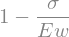

In [5]:
omega_val = sp.solve(sp.Eq(sigma, sigma_), omega)
omega_val[0]

In [6]:
sigma_1 = E * w
omega_val_1 = omega_val[0].subs(sigma, sigma_1)
omega_val_1

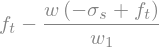

In [7]:
sigma_2 = f_t - (f_t - sigma_s) * (w / w_1) 
sigma_2

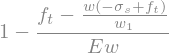

In [8]:
omega_val_2 = omega_val[0].subs(sigma, sigma_2)
omega_val_2

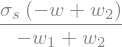

In [9]:
sigma_3 = sigma_s * (w_2 - w) / (w_2 - w_1)
sigma_3

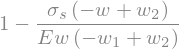

In [10]:
omega_val_3 = omega_val[0].subs(sigma, sigma_3)
omega_val_3

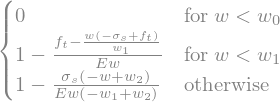

In [11]:
omega_val = sp.Piecewise(
    (omega_val_1, w < w_0),
    (omega_val_2, w < w_1),
    (omega_val_3, True)
)
omega_val

In [12]:
get_omega = sp.lambdify((w, E,w_0,w_1, w_2, f_t, sigma_s), omega_val, 'numpy')

<IPython.core.display.Javascript object>


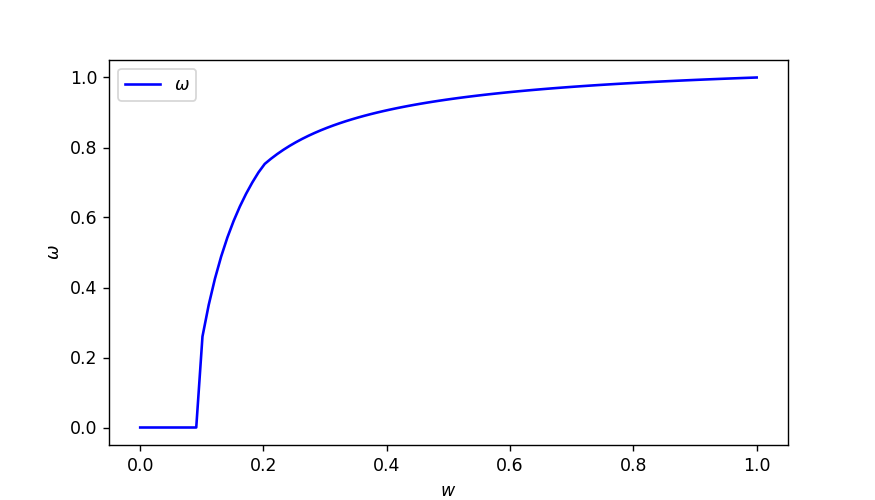

<string>:2: RuntimeWarning: divide by zero encountered in true_divide


In [13]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
w_range = np.linspace(0, 1, 100)
omega_rec = get_omega(w_range,100,0.1,0.2,1,10,5 ) 
ax1.plot(w_range, omega_rec, color='b', label = '$\omega$')
ax1.set_xlabel('$w$'); ax1.set_ylabel('$\omega$')
ax1.legend()

## Calculating local cohesive breaking energy
\begin{gather*}
w_x = CMOD_c\left[\left(1 - \frac{x}{a_c}\right)^2 + \left(1.081 - 1.149 \left(\frac{a_c}{D}\right)\right)\left[\frac{x}{a_c} - \left(\frac{a_0}{a_c}\right)^2\right]\right]^{1/2} 
\end{gather*}
\begin{gather*}
a_i = \frac{2}{\pi}(D + H_0) \arctan{\sqrt{\frac{B E C_{si}}{32.6} - 0.1135}} - H_0
\end{gather*}

In [14]:
w_x = sp.Symbol('w_x', nonnegative = True)
f_c = sp.Symbol('f_c', nonnegative = True)
sigma_s = sp.Symbol(r'\sigma_s', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)
D = sp.Symbol('D', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
a_0 = sp.Symbol('a_0', nonnegative = True)
f_t = sp.Symbol('f_t', nonnegative = True)
CMOD_c = sp.Symbol('CMOD_c', nonnegative = True)
a  = sp.Symbol('a', nonnegative = True)

In [15]:
params = {P_max : 9720, #N
          D : 500, #mm
          H_0 : 3, #mm 
          B : 196, #mm
          E : 26720, #N/mm2 
          a_0 : 0.46, #mm
          a : 493.49, #mm
          CMOD_c : 0.13663, #mm
          sigma_s : 5, #N/mm2
          f_t : 10, #N/mm2
          pi : 3.14, 
          w_0 : 0.1, #mm
          w_1 : 0.2, #mm
          w_2 : 1 #mm
         }

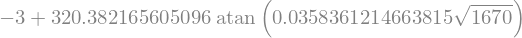

In [16]:
C_si = CMOD_c / P_max
a_i = ((2/pi) * (D + H_0) * sp.atan(sp.sqrt((B*E*C_si)/(32.6)-0.1135))) - H_0
a_c_ = a_i.subs(params)
a_c_

\begin{gather*}
g_f(x) =\int_{0}^{w_x} \sigma(w)dw
\end{gather*}

In [17]:
a_c  = sp.Symbol('a_c', nonnegative = True)
x = sp.Symbol('x', nonnegative = True)
#w_x = CMOD_c * sp.sqrt(((1 - x/a_c)**2 + (1.081 - 1.149*(a_c/D)))*(x/a_c - (a_0/a_c)**2))
#w_x_ = w_x.subs(a_c,a_c_)
#wx_ = sp.simplify(w_x_)
#wx_

In [18]:
#get_w_x = sp.lambdify((x), wx_.subs(params), 'numpy')
#wx_.subs(params)

In [19]:
#fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
#x_range = np.linspace(0, 1, 100)
#w_x_rec = get_w_x(x_range) 
#ax1.plot(x_range, w_x_rec, color='r', label = '$w$')
#ax1.set_xlabel('$x$'); ax1.set_ylabel('$w$')
#ax1.legend()

In [20]:
sigma_1 = E * w
sigma_2 = f_t - (f_t - sigma_s) * (w / w_1) 
sigma_3 = sigma_s * (w_2 - w) / (w_2 - w_1)

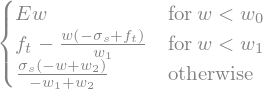

In [21]:
sigma = sp.Piecewise(
    (sigma_1, w < w_0),
    (sigma_2, w < w_1),
    (sigma_3, True)
)
sigma 

In [22]:
get_sigma = sp.lambdify((w), sigma.subs(params), 'numpy')
get_sigma;

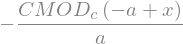

In [23]:
w_ = -CMOD_c / a * (x - a)
get_w = sp.lambdify(x, w_.subs(params), 'numpy')
w_

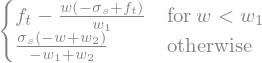

In [24]:
sigma_ = sp.Piecewise(
    (sigma_2, w < w_1),
    (sigma_3, True)
)
sigma_ 

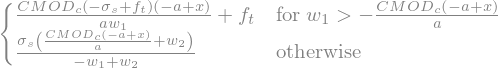

In [25]:
sigma_x_ = sigma_.subs(w, w_)
sigma_x_

In [26]:
#sigma_x_ = sigma_.subs(w, w - w_0).subs(w, w_)
#sigma_x_

In [27]:
get_sigma_x = sp.lambdify(x, sigma_x_.subs(params), 'numpy')
sigma_x_.subs(params)

<img src="cracktipzoom.png" width="600"/> 

<IPython.core.display.Javascript object>


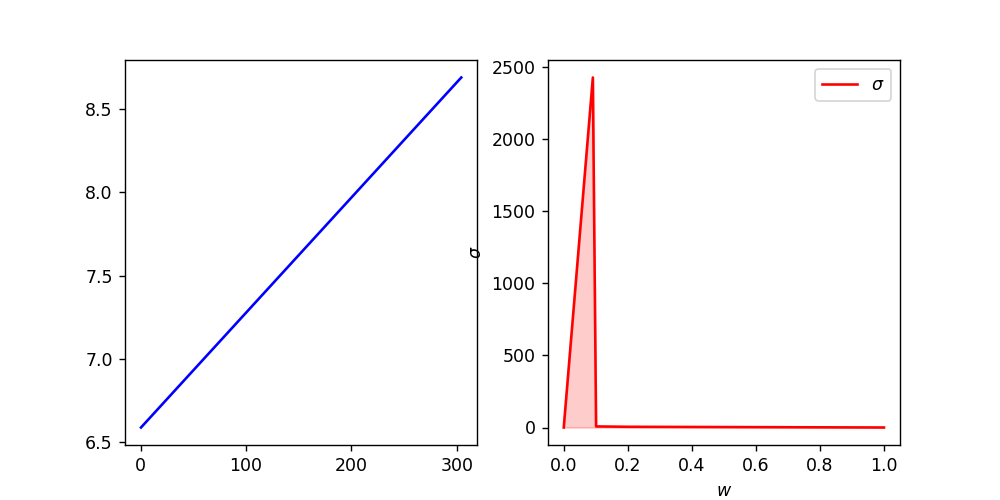

In [46]:
fig, ((ax0, ax1)) = plt.subplots(1,2,figsize=(8,4))
x_range = np.linspace(0.46, 304.2, 100)
#ax0.plot(x_range, get_w(x_range))
ax0.plot(x_range, get_sigma_x(x_range), color='blue')
w_range = np.linspace(0, 1, 100)
sigma_rec = get_sigma(w_range) 
ax1.plot(w_range, sigma_rec, color='r', label = '$\sigma$')
ax1.fill_between(w_range, sigma_rec, 0, color='r', alpha=0.2)
ax1.set_xlabel('$w$'); ax1.set_ylabel('$\sigma$')
ax1.legend();

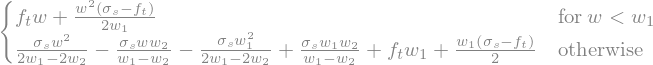

In [29]:
g = sp.integrate(sigma_, (w))
g

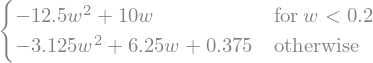

In [30]:
get_g = sp.lambdify((w), g.subs(params), 'numpy')
g.subs(params)

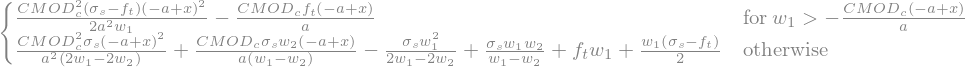

In [31]:
g_a = g.subs(w, w_)
g_a

In [32]:
get_g_a = sp.lambdify((x), g.subs(w, w_).subs(params), 'numpy' )
g.subs(w, w_).subs(params)

<img src="gfdistribution.png" width="600"/> 

<IPython.core.display.Javascript object>


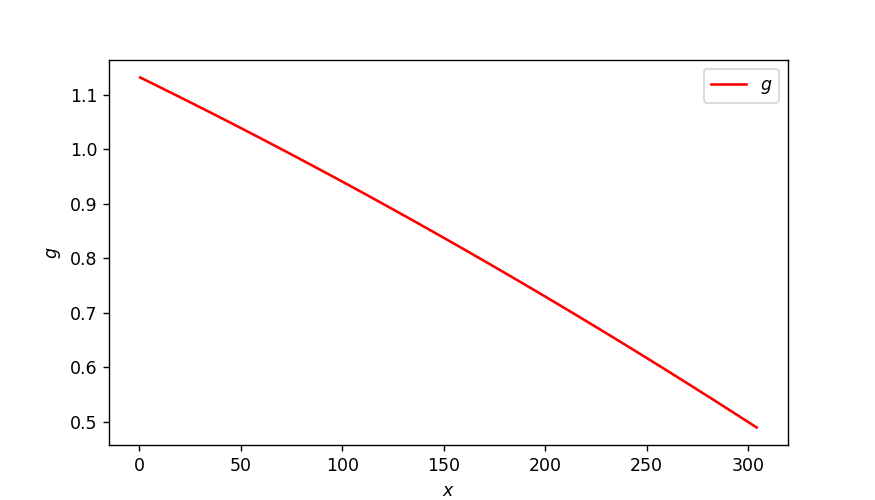

In [47]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0.46,304.2, 100)
g_rec = get_g_a(x_range) 
ax1.plot(x_range, g_rec, color='r', label = '$g$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$g$')
ax1.legend();

### Determining Cohesive Breaking Energy
$G_{I-cohesive}$ is defined as the average energy dissipation per unit length due to bridging cohesive action:
\begin{gather*}
G_{I-cohesive} = \frac{1}{a - a_0} \int_{a_0}^{a} \int_{0}^{w} \sigma(w_x) dw dx
\end{gather*} 
especially when crack length $a$ reaches critical effective crack propagation length $a_c$, $G_{I-cohesive}$ becomes critical cohesive crack breaking energy $G^c_{Ic}$ and is given as:
\begin{gather*}
G_{Ic} = \frac{1}{a_c - a_0} \int_{a_0}^{a_c} \int_{0}^{w} \sigma(w_x) dw dx
\end{gather*} 

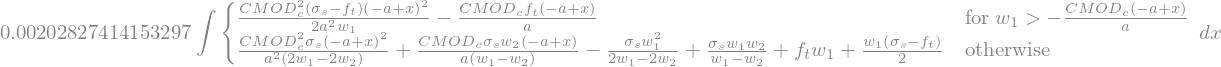

In [34]:
G_I_c = 1/(493.49 - 0.46) * sp.integrate(g_a, (x))
#G_Ic = sp.simplify(G_I_c)
#G_Ic
G_I_c

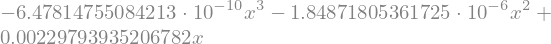

In [35]:
G_Ic = sp.simplify(G_I_c.subs(params))
G_Ic

In [36]:
get_G_I_c = sp.lambdify((x), G_Ic, 'numpy')

<IPython.core.display.Javascript object>


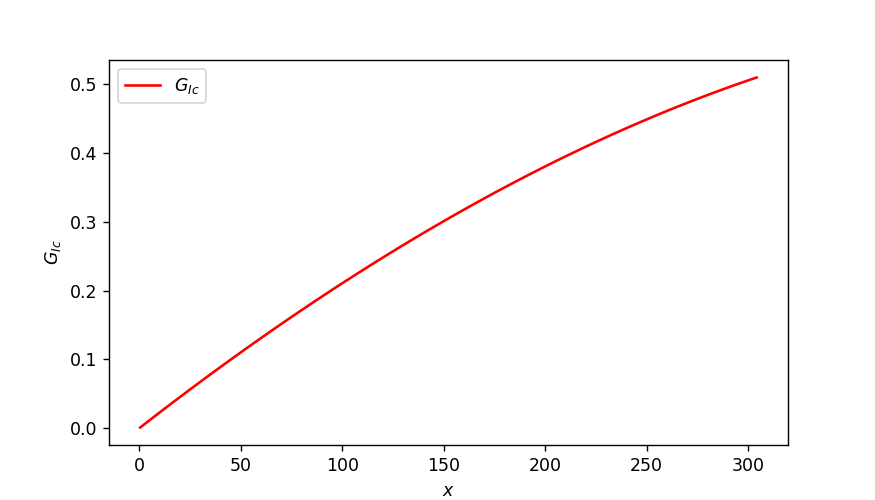

In [48]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0.46, 304.2, 100)
G_I_c_ = get_G_I_c(x_range)  
ax1.plot(x_range, G_I_c_, color='r', label = '$G_{Ic}$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$G_{Ic}$')
ax1.legend()

In [45]:
G_I_c_

array([0.00105666, 0.01244621, 0.02374352, 0.03494814, 0.04605956,
       0.05707732, 0.06800094, 0.07882992, 0.08956381, 0.1002021 ,
       0.11074433, 0.12119001, 0.13153866, 0.14178981, 0.15194297,
       0.16199766, 0.17195341, 0.18180972, 0.19156613, 0.20122216,
       0.21077731, 0.22023112, 0.2295831 , 0.23883278, 0.24797966,
       0.25702328, 0.26596315, 0.27479879, 0.28352972, 0.29215546,
       0.30067554, 0.30908947, 0.31739676, 0.32559695, 0.33368956,
       0.34167409, 0.34955007, 0.35731703, 0.36497447, 0.37252193,
       0.37995892, 0.38728496, 0.39449956, 0.40160226, 0.40859257,
       0.41547001, 0.4222341 , 0.42888437, 0.43542032, 0.44184148,
       0.44814737, 0.45433751, 0.46041142, 0.46636862, 0.47220863,
       0.47793097, 0.48353516, 0.48902072, 0.49438716, 0.49963402,
       0.50476081, 0.50976704, 0.51465224, 0.51941594, 0.52405764,
       0.52857687, 0.53297315, 0.537246  , 0.54139493, 0.54541948,
       0.54931915, 0.55309347, 0.55674196, 0.56026414, 0.56365

### Unstable Fracture Energy
The unstable fracture energy can be obtained as:
\begin{gather*}
G^{un}_{Ic} = \frac{3 P^2_{max}}{4 B^2 D^3 E} V'(\alpha)
\end{gather*}
\begin{gather*}
V(\alpha) = \left( \frac{\alpha}{1 - \alpha} \right)^2 [5.58 - 19.57 \alpha + 36.82 \alpha^2 - 34.94 \alpha^3 + 12.77 \alpha^4]
\end{gather*}
\begin{gather*}
\alpha = \frac{(a + H_0)}{(D + H_0)}
\end{gather*}

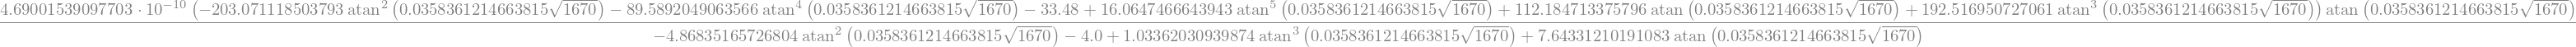

In [38]:
alpha = sp.Symbol(r'\alpha', nonnegative = True)
P = sp.Symbol('P', nonnegative = True)
V_alpha = (alpha / (1 - alpha))**2 * (5.58 - 19.57* alpha + 36.82 * alpha**2 - 34.94 * alpha**3 + 12.77 * alpha**4)
G_un = sp.simplify((3*(P_max)**2)/(4*B**2*D**3*E) * V_alpha.diff(alpha))
alpha_c = (a_c_ + H_0) / (D + H_0)
G_un_f = G_un.subs(alpha,alpha_c).subs(params)
G_un_f

### Initial Fracture Energy
\begin{gather*}
G^{ini}_{Ic} = \frac{3 P^2_{ini}}{4 B^2 D^3 E} V'(\alpha)
\end{gather*}
or, 
\begin{gather*}
G^{ini}_{Ic} = G^{un}_{Ic}  - G^{c}_{Ic}
\end{gather*}

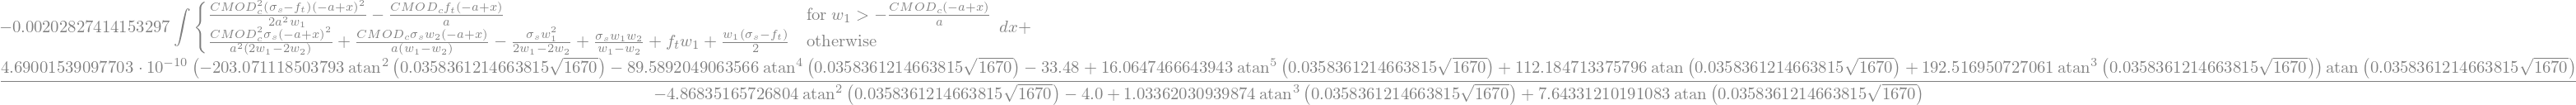

In [39]:
G_ini = G_un_f - G_I_c
G_ini

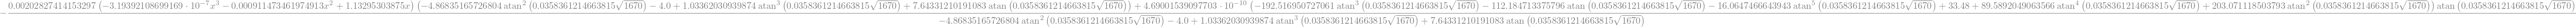

In [40]:
G_ini_ = sp.simplify(G_ini.subs(params))
G_ini_

In [41]:
get_G_ini = sp.lambdify((x), G_ini_, 'numpy')
get_G_ini

<function _lambdifygenerated(x)>

<IPython.core.display.Javascript object>


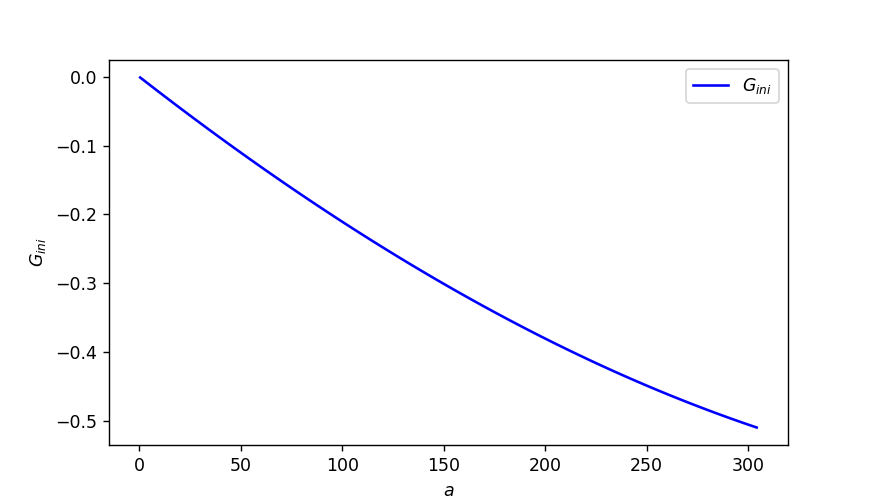

In [50]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0.46, 304.2, 100)
G_ini_ = get_G_ini(x_range) 
ax1.plot(x_range, G_ini_, color='b', label = '$G_{ini}$')
ax1.set_xlabel('$a$'); ax1.set_ylabel('$G_{ini}$')
ax1.legend()

In [44]:
G_ini_

array([-0.00105665, -0.01244619, -0.02374351, -0.03494813, -0.04605955,
       -0.05707731, -0.06800093, -0.07882991, -0.08956379, -0.10020209,
       -0.11074432, -0.12119   , -0.13153865, -0.1417898 , -0.15194296,
       -0.16199765, -0.17195339, -0.18180971, -0.19156612, -0.20122215,
       -0.2107773 , -0.22023111, -0.22958309, -0.23883276, -0.24797965,
       -0.25702327, -0.26596313, -0.27479877, -0.28352971, -0.29215545,
       -0.30067553, -0.30908945, -0.31739675, -0.32559694, -0.33368954,
       -0.34167408, -0.34955006, -0.35731702, -0.36497446, -0.37252192,
       -0.37995891, -0.38728494, -0.39449955, -0.40160225, -0.40859256,
       -0.41547   , -0.42223409, -0.42888435, -0.4354203 , -0.44184147,
       -0.44814736, -0.4543375 , -0.46041141, -0.46636861, -0.47220862,
       -0.47793096, -0.48353515, -0.4890207 , -0.49438715, -0.49963401,
       -0.50476079, -0.50976703, -0.51465223, -0.51941593, -0.52405763,
       -0.52857686, -0.53297314, -0.53724598, -0.54139492, -0.54

<IPython.core.display.Javascript object>


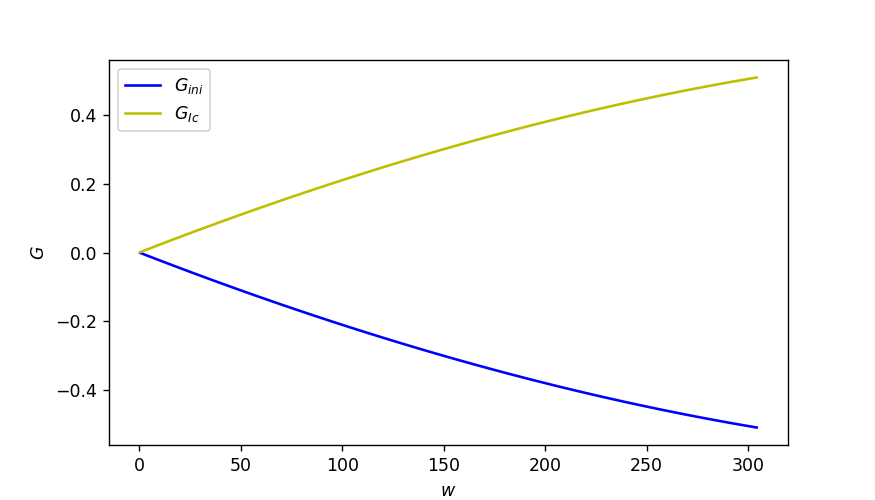

In [51]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
a_range = np.linspace(0.46, 304.2, 100)
G_ini_ = get_G_ini(x_range) 
G_I_c_ = get_G_I_c(x_range)  
ax1.plot(x_range, G_ini_, color='b', label = '$G_{ini}$')
ax1.plot(x_range, G_I_c_, color='y', label = '$G_{Ic}$')
ax1.set_xlabel('$w$'); ax1.set_ylabel('$G$')
ax1.legend()